# Подготовка среды и датасетов

In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

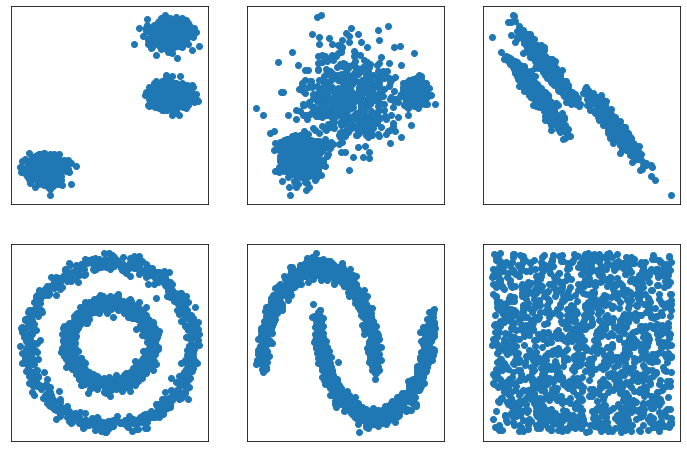

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

       
    

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

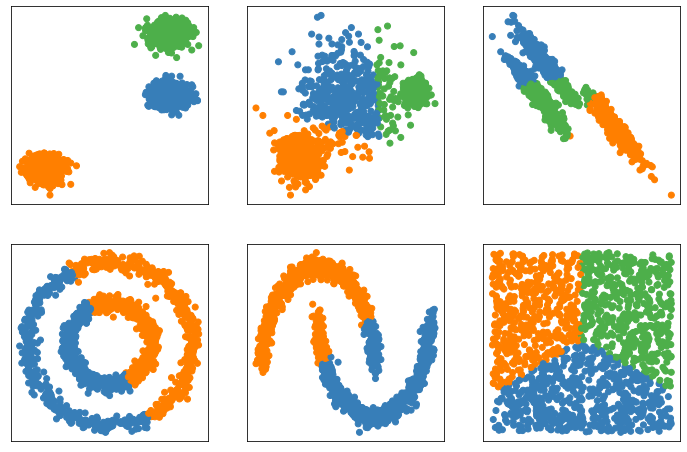

In [7]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Обучив, мы можем получить центроиды кластеров:

In [16]:
k_means.cluster_centers_

array([[ 0.02490566, -1.02678465],
       [-0.95421783,  0.64436545],
       [ 0.94330833,  0.65771607]])

И узнать, в какой кластер попал каждый из объектов:

In [17]:
k_means.labels_

array([0, 2, 0, ..., 2, 0, 0])

Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

### Практика

Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

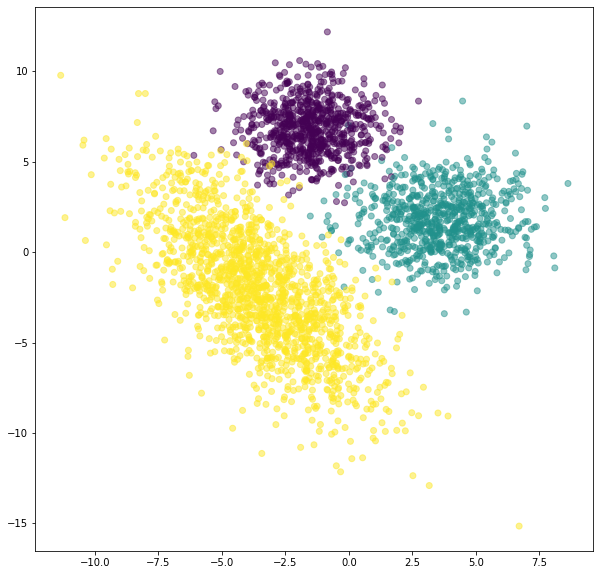

In [25]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [27]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [28]:
from sklearn.cluster import KMeans

#### Задание 4.5.2

Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [24]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

#np.round(k_means.cluster_centers_.astype(np.int))
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


astype(np.int) конвертирует элементы массива в целые числа.

#### Задание 4.5.3

Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [30]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

Для визуализации получившегося датасета можно использовать следующий код:

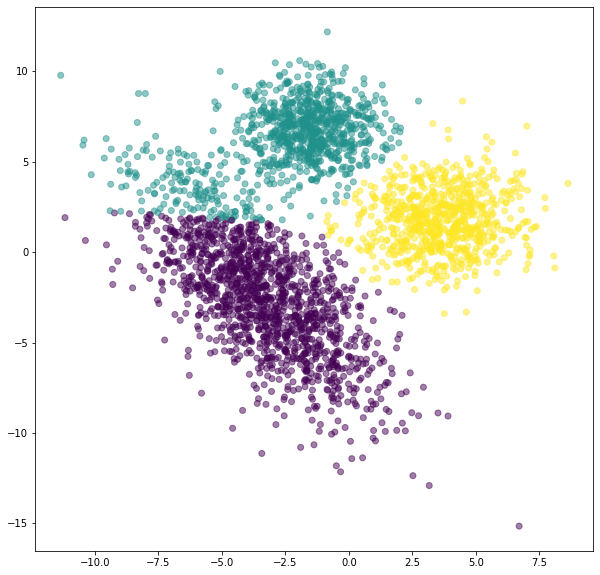

In [31]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

#### ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

В датасете для учеников предоставлены следующие признаки:

Год выпуска<br />
Пол<br />
Возраст<br />
Количество друзей<br />
36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [54]:
import pandas as pd

df = pd.read_csv('input/snsdata.csv')

df = df.drop(columns=['gradyear', 'gender', 'age', 'friends'], axis = 1)

df

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
scaler = StandardScaler()

X = scaler.fit_transform(df)

In [56]:
k_means = KMeans(n_clusters=9, random_state=123)
    
k_means.fit(X)

y_pred = k_means.predict(df)

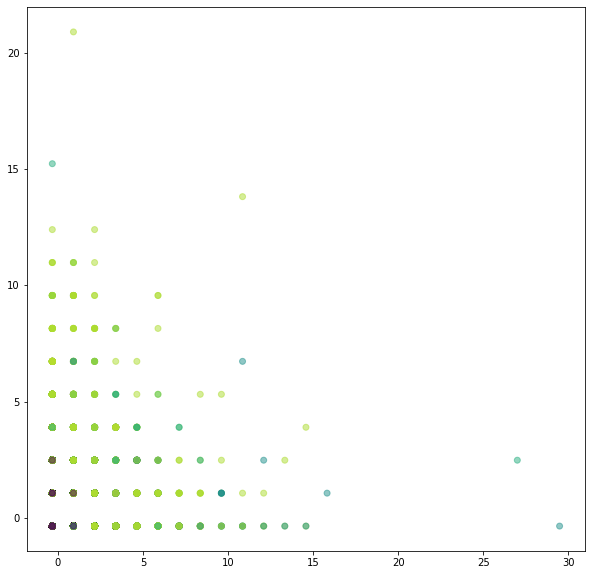

In [57]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.show()

In [48]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

20347 424 830 1 1026 932 644 5032 764 

In [58]:
pd.DataFrame(y_pred)[0].value_counts()

7    17066
0    10380
4      803
5      752
8      425
6      288
1      202
2       83
3        1
Name: 0, dtype: int64

In [59]:
df['label'] = k_means.labels_
grouped = df.groupby(by='label').sum()
grouped = grouped[['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']]
grouped

,music,god,dance,hair,shopping,cute,band,rock,football,church
label,,,,,,,,,,
0,10997,6356,4341,3672,3402,3031,3138,2994,3216,2535
1,460,2011,165,195,148,128,174,142,115,738
2,752,380,576,758,764,507,160,244,335,199
3,0,10,1,12,0,1,1,1,2,0
4,746,531,459,454,532,367,230,243,443,367
5,2060,874,855,3045,482,671,684,1079,479,360
6,451,337,394,342,453,351,123,222,340,219
7,5732,3066,5620,3915,4587,4426,1379,2103,2430,2836
8,937,394,344,284,222,204,3099,272,209,191


# EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [8]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

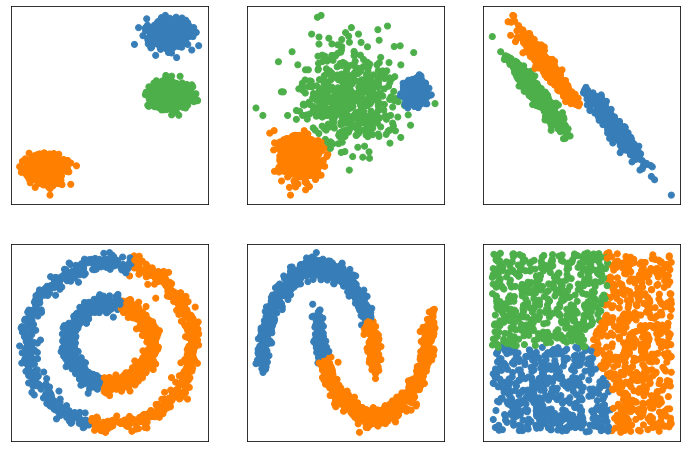

In [9]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

#### Для решения задач используйте датасет, который мы создавали в теме «K-means. Практика»:

#### Задание 4.6.2

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_predict = gm.predict(X)
unique, counts = np.unique(y_predict, return_counts=True)
dict(zip(unique, counts))
Xy = np.hstack((X, y_predict.reshape(3000, 1)))
Xy
import pandas as pd
df = pd.DataFrame(Xy, columns=['X1', 'X2', 'y'])
df.groupby('y').mean()
df.groupby('y').mean().apply(round).astype(np.int)

,X1,X2
y,,
0.0,-2,-5
1.0,1,4
2.0,-5,1


In [73]:
np.round(gm.means_).astype(np.int)

array([[-2, -4],
       [ 1,  4],
       [-5,  0]])

#### Задание 4.6.3

Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:



In [74]:
_, counts = np.unique(y_predict, return_counts=True)
for count in counts:
    print(count, end=' ')

795 1510 695 

#### Задание 4.6.4

Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним EM-алгоритм , количество кластеров — 9, random_state = 123. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [80]:
from sklearn.mixture import GaussianMixture
import pandas as pd
data = pd.read_csv("input/snsdata.csv")
data.drop(["gradyear","gender","age","friends"], axis = 1, inplace = True)
col_name = data.columns
data = StandardScaler().fit_transform(data)
gm = GaussianMixture(n_components = 9, random_state = 123)
y_pred = gm.fit_predict(data)
gm.n_iter_

29

In [82]:
y_pred[7]

3

In [83]:
gm.n_iter_

29

# Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [10]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

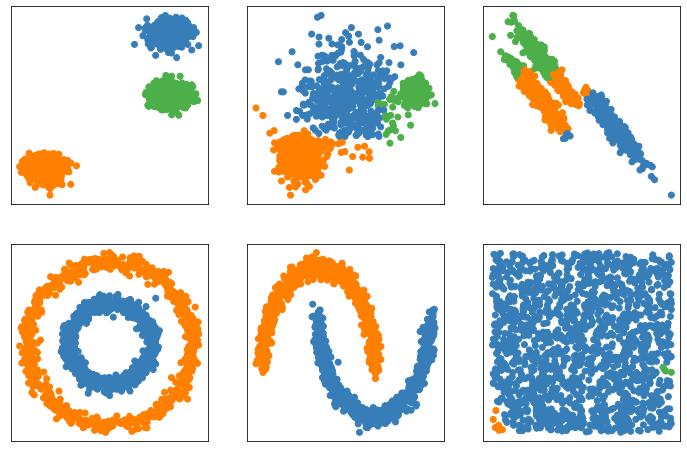

In [11]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Примечание. Матрица смежности — это матрица, которая соответствует графу, и которая отражает, с какими соседями объект соединен или нет. Например, на рисунке ниже объект а соединен с е, f, b, поэтому на пересечении  строки (столбца) а со столбцами (строками) e, f, b стоят единички.

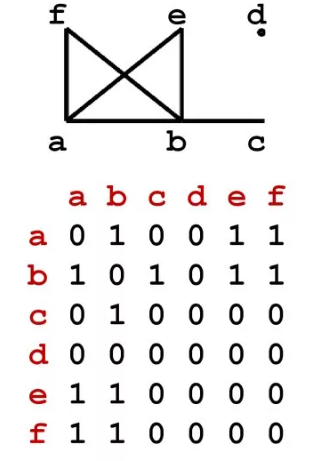

Вместо единичек, которые показывают, есть связь или нет, могут быть другие характеристики. Например, расстояние между объектами.

Мы используем здесь матрицу смежности по той причине,что агломеративная кластеризация строится в качестве одного из вариантов именно по такой матрице, которая показывает, сколько ближайших соседей находится рядом с объектом.

В алгоритме мы сначала нормализуем признаки объектов, а затем строим матрицу смежности. Так мы получаем расстояние между объектами датасета. Далее создаём объект агломеративной кластеризации и передаём в него матрицу. Обучаем алгоритм, игнорируем предупреждения и строим предсказания.

В результате агломеративная кластеризация справилась лучше, чем EM-алгоритм со сложными кластерами, с ленточными, наоборот, хуже. При отсутствии кластерной структуры агломеративная кластеризация более явно определяет это.

#### Задание 4.7.1

При каком значении параметра linkage при создании объекта AgglomerativeClustering критерием объединения кластеров будет среденее расстояние между объектами объединяемых кластеров?

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Посмотрим распределение классов в датасете:

In [85]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

При использовании переменных X и Y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет агломеративную кластеризацию датасета, инициализируется следующим образом:

In [92]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)

В отличие от k-means, AgglomerativeClustering не имеет параметра random_state.

Обучение модели AgglomerativeClustering проходит аналогично обучению модели k-means:

In [93]:
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [94]:
ac.labels_

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

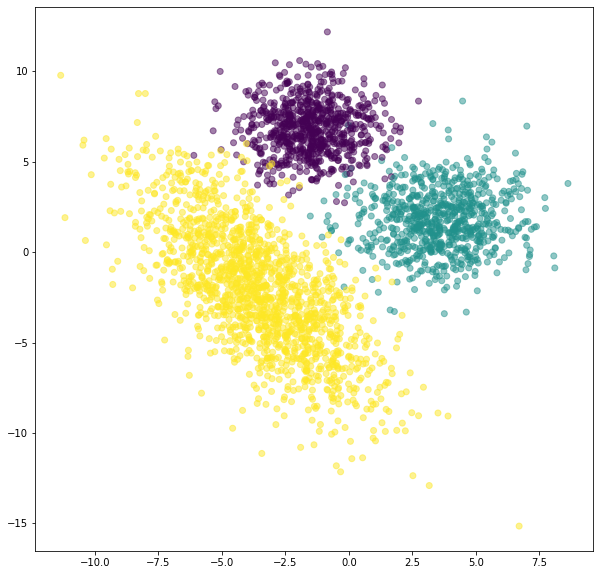

In [91]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [95]:
ac.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 3}

Обучите модель AgglomerativeClustering с параметром n_clusters=3 на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

In [96]:
ac.n_leaves_

3000

#### Задание 4.7.2

Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [97]:
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

#### Задание 4.7.3

При создании модели AgglomerativeClustering можно указать матрицу смежности, передав её в параметр connectivity. Построить матрицу смежности можно с помощью следующего кода:

In [117]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
X_connectivity = 0.5 * (connectivity + connectivity.T)

In [102]:
# print(connectivity)

В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель AgglomerativeClustering с параметром n_clusters=3 и составленной матрицей смежности на признаках исходного датасета.

Посчитайте матрицу смежности, используя приведённый код. Подставьте получившееся значение в параметр connectivity при создании объекта AgglomerativeClustering. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

In [118]:
ac = AgglomerativeClustering(n_clusters=3, connectivity=X_connectivity)
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=3)

In [119]:
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1486 746 768 

#### Задание 4.7.4

Постройте дендрограмму с помощью пакета scipy:

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

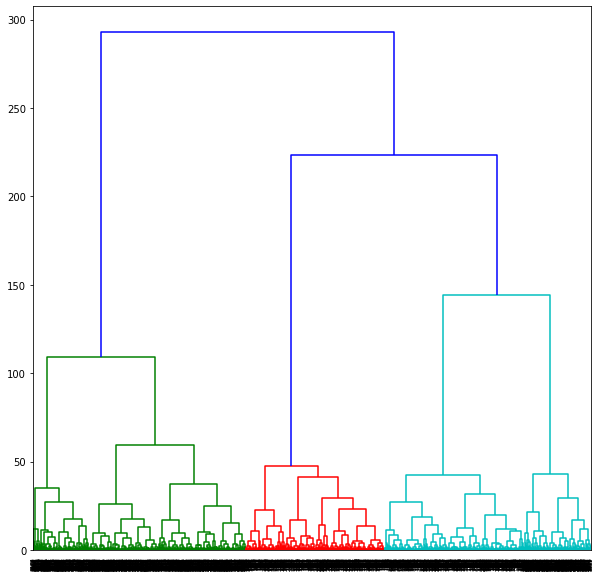

In [121]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)

На выходе должно получиться изображение иерархического дерева.

Постройте дендрограмму на исходном наборе данных. Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

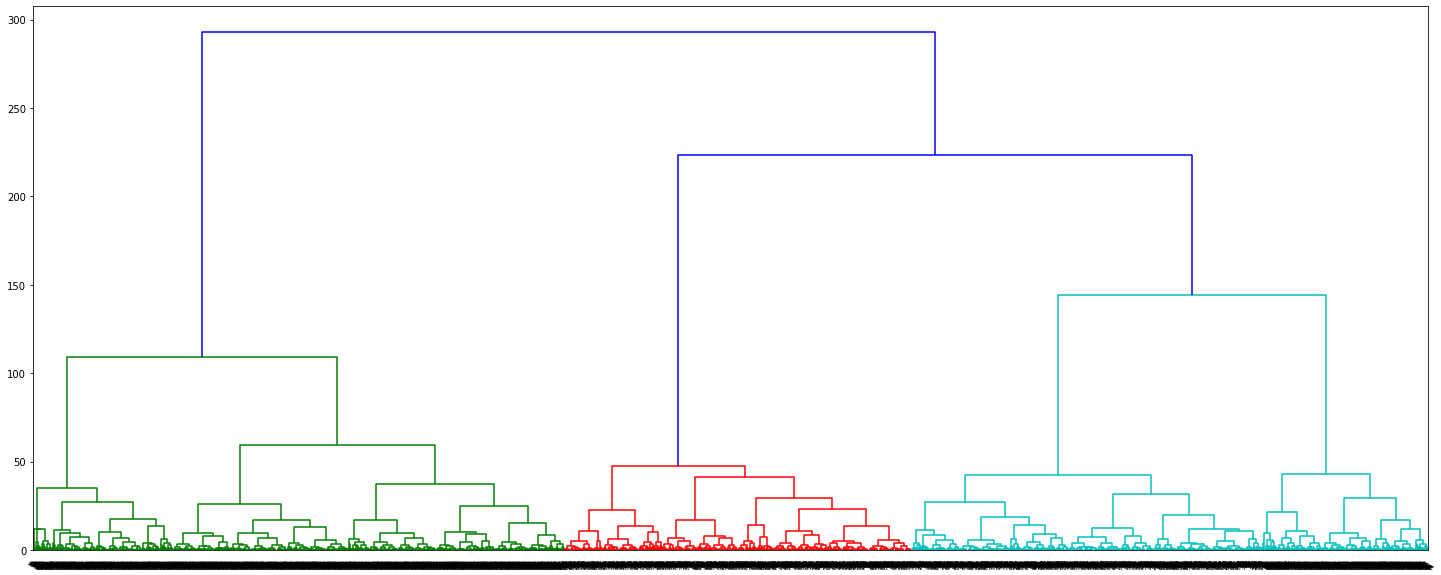

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

fig = plt.figure(figsize=(25, 10))
# строим дендрограмму
dn = dendrogram(Z, leaf_rotation=150., show_leaf_counts=True)
plt.show()

#### Задание 4.7.6

Сколько всего кластеров получилось для продуктов (новый датасет)?


In [149]:
from sklearn.mixture import GaussianMixture
import pandas as pd
data = pd.read_csv('input/food.txt', sep=" ", header=None)
data.columns = ["Name", "Energy", "Protein", "Fat", "Calcium", "Iron"]
data = data.drop([0])
data[['Energy', 'Protein', 'Fat', 'Calcium', 'Iron']] = data[['Energy', 'Protein', 'Fat', 'Calcium', 'Iron']].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     27 non-null     object 
 1   Energy   27 non-null     int64  
 2   Protein  27 non-null     int64  
 3   Fat      27 non-null     int64  
 4   Calcium  27 non-null     int64  
 5   Iron     27 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ KB


In [159]:
data[(data.Calcium >= 150) & (data.Calcium <= 160)]

,Name,Energy,Protein,Fat,Calcium,Iron
22,Canned mackerel,155,16,9,157,1.8
24,Canned salmon,120,17,5,159,0.7


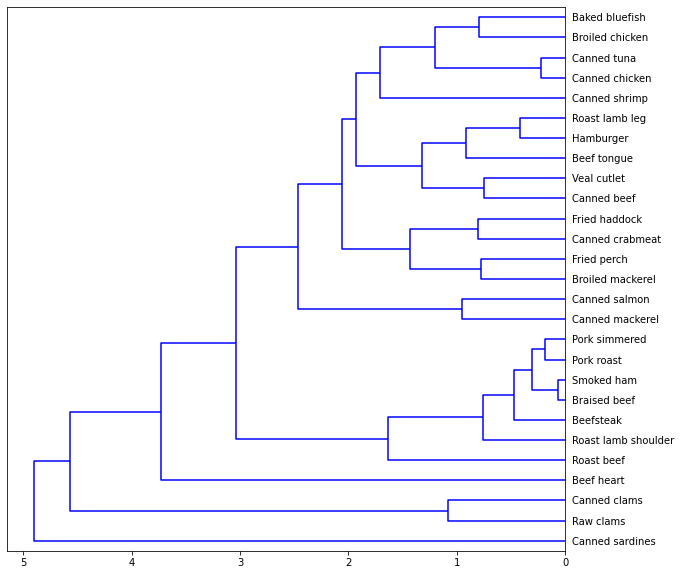

In [151]:
X = StandardScaler().fit_transform(data.drop(['Name'],axis=1))
Z = linkage(X, method='average', metric='euclidean')
names = data.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, orientation='left')

Сколько всего кластеров получилось для продуктов?

In [152]:
# кол-во кластеров

from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

len(np.unique(labels))

6

In [154]:
labels

array([2, 4, 2, 2, 4, 4, 4, 5, 4, 2, 2, 2, 2, 4, 4, 4, 1, 1, 4, 4, 4, 3,
       4, 3, 6, 4, 4], dtype=int32)

In [155]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{1: 2, 2: 7, 3: 2, 4: 14, 5: 1, 6: 1}

Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [161]:
data['label'] = labels
grouped = data.groupby(by='label').sum()
grouped = grouped[['Calcium']]
grouped

,Calcium
label,
1,156
2,61
3,316
4,273
5,14
6,367


Введите номер кластера, в который попал продукт с максимальной жирностью.

In [163]:
grouped = data.groupby(by='label').sum()
grouped = grouped[['Fat']]
grouped

,Fat
label,
1,2
2,211
3,14
4,123
5,5
6,9


# DBSCAN

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

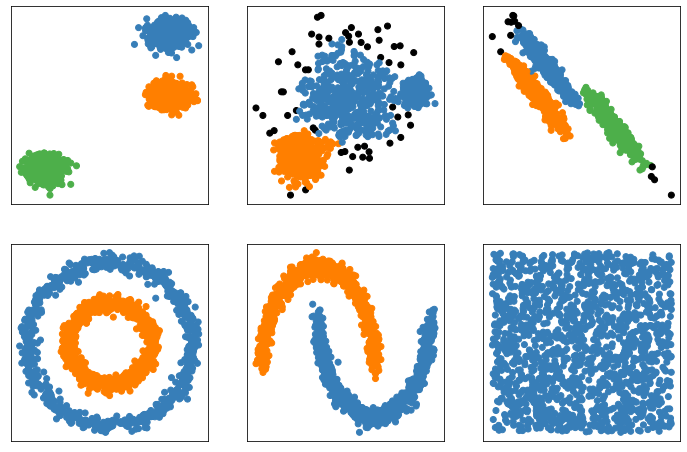

In [13]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Из набора данных случайным образом выбираем точку и смотрим её окрестности. Если там не менее четырёх точек, то мы помечаем скопление кластером и далее для каждой точки из окрестности рассматриваем такое же окружение. Повторяем до момента окончания точек в наборе.

Посмотрим, как реализуется алгоритм DBSCAN в пакете Sklearn. При инициализации можно задать размер окрестностей eps и минимальное число точек в этой окрестности min_sample:

Для решения задач используйте датасет, который мы создавали в теме «K-means. Практика»:

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

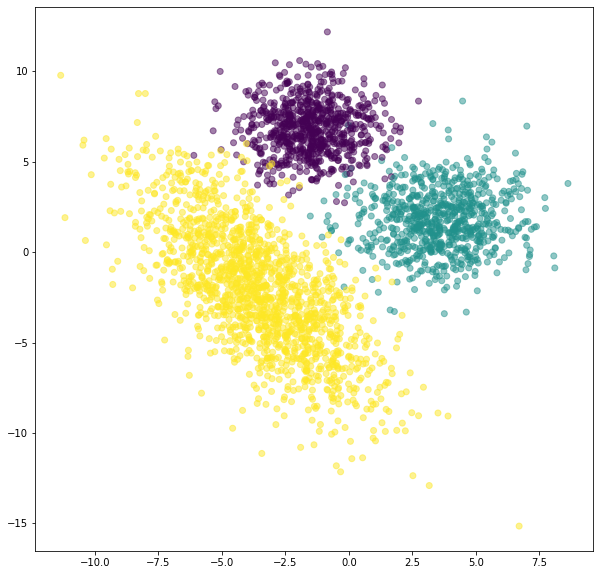

In [167]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [168]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

При использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма DBSCAN, инициализируется так:

In [169]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

В отличие от k-means и AgglomerativeClustering, класс DBSCAN не имеет параметра n_clusters, поскольку DBSCAN автоматически определяет число кластеров в выборке.

Обучение модели DBSCAN проходит аналогично обучению модели k-means:

In [170]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [171]:
dbscan.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

#### Задание 4.8.2

Обучите модель DBSCAN с параметрами eps=0.9 и min_samples=35 на признаках объектов исходного датасета. Выведите число получившихся кластеров.

Обратите внимание, что DBSCAN определяет выбросы, относя их к кластеру -1. Кластер выбросов учитывать в ответе не нужно.

In [173]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
dbscan.labels_
y_pred = dbscan.labels_.astype(np.int)
y_pred

array([0, 0, 1, ..., 2, 2, 2])

In [174]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 368, 0: 656, 1: 721, 2: 1255}

#### Задание 4.8.4

Проверьте, как настройка параметров влияет на результат работы DBSCAN. Обучите модель DBSCAN с параметрами eps=0.8 и min_samples=35 на признаках объектов исходного датасета.

Выведите число объектов выборки, которые были отмечены как выбросы.

In [175]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
dbscan.labels_
y_pred = dbscan.labels_.astype(np.int)
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 583, 0: 603, 1: 681, 2: 1133}

Сравним алгоритмы по параметрам, которые необходимо задать изначально, возможности для масштабирования алгоритма, сценарию использования (когда лучше всего пользоваться этим алгоритмом) и используемой метрике расстояния.

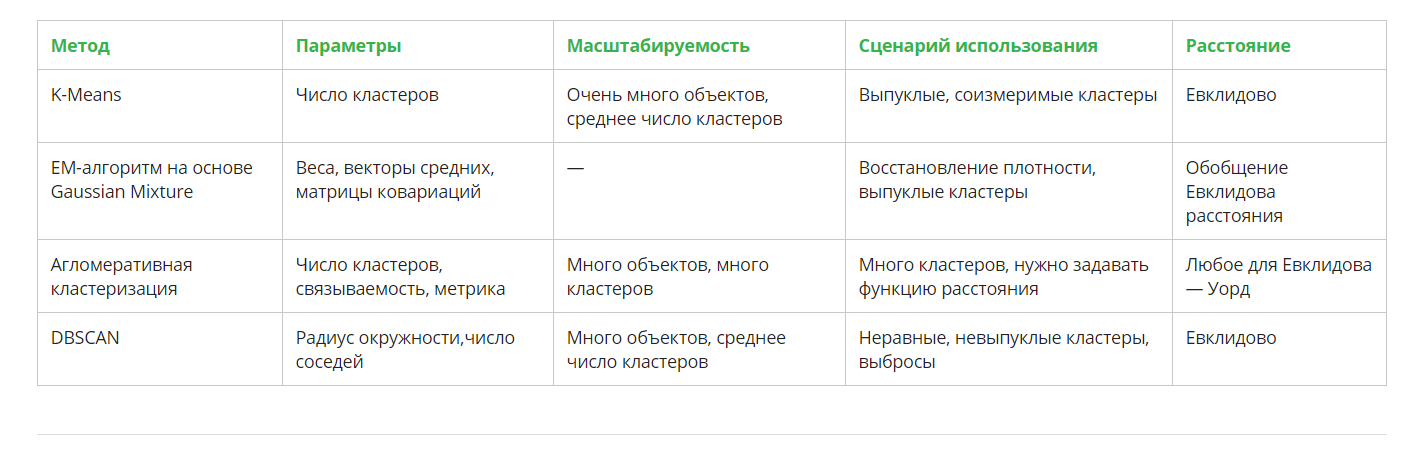

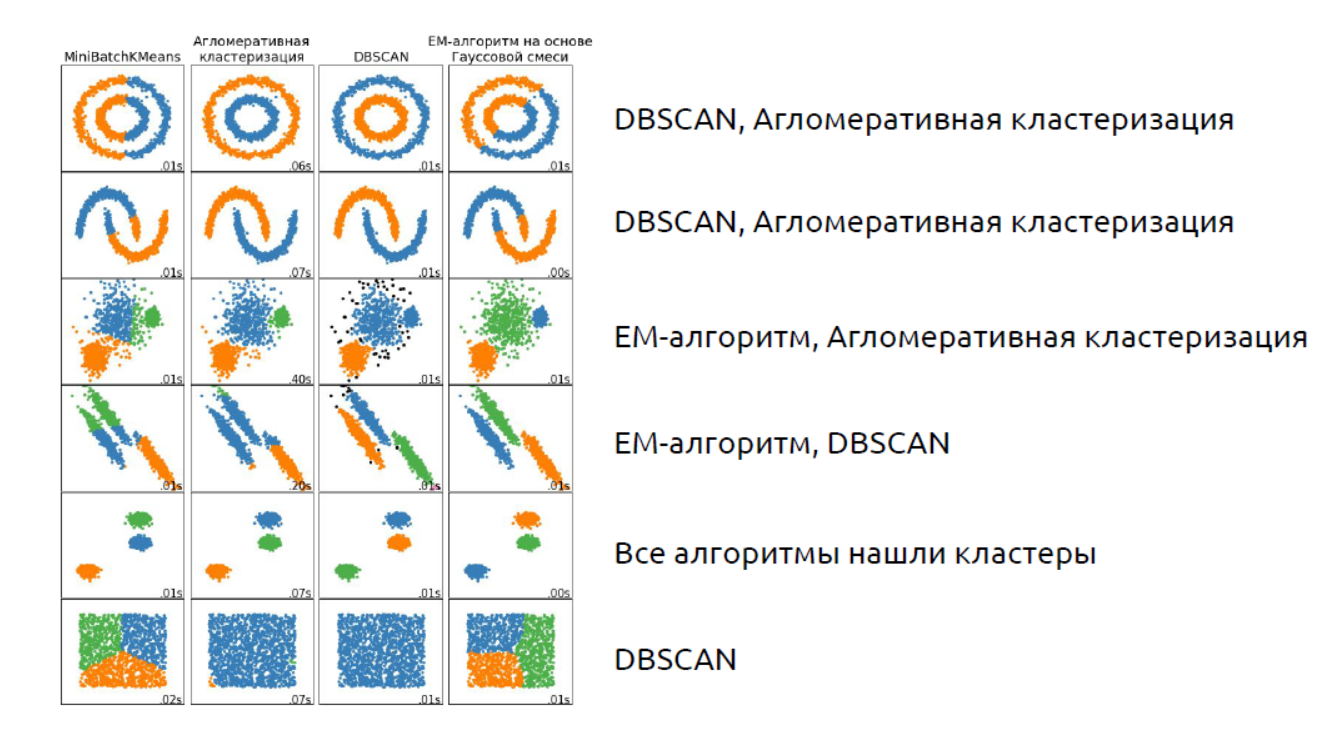